Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00144: Experimental Methods in Civil Engineering


### Part II: Instrumentation
[8.   Analog signals processing](#section_8)  

&nbsp;&nbsp;&nbsp;[8.1. Autocovariance function and stationarity](#section_81)     
&nbsp;&nbsp;&nbsp;[8.2. Fourier series and Fourier transform](#section_82)   
&nbsp;&nbsp;&nbsp;[8.3. Power spectral density and periodograms](#section_83)   
&nbsp;&nbsp;&nbsp;[8.4. White noise and pink noise](#section_84)   
&nbsp;&nbsp;&nbsp;[8.5. Signal derivation and integration](#section_85)   
&nbsp;&nbsp;&nbsp;[8.6. Level crossing rate and peak factor](#section_86)   
&nbsp;&nbsp;&nbsp;[8.7. Frequency domain signal filtering](#section_87)   
&nbsp;&nbsp;&nbsp;[8.8. Cross correlation and coherence functions](#section_88)   
&nbsp;&nbsp;&nbsp;[8.9. Simulation of cross-correlated signals](#section_89)   

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 


In [1]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from   MRPy import MRPy

## 8. Analog signals processing  <a name="section_8"></a> 

### 8.1. Autocovariance function and stationarity  <a name="section_81"></a> 

Analog signals are the outcome of some physical measurement, usually some electrical 
quantity like voltage, current, or electric charge. The magnitude of such quantities 
are expected to be _analogous_ to some observed physical quantity, like stress, 
force, displacement, acceleration, etc. 

An analog signal is generally considered as a random process, $X(t)$. A random process
is a time dependent random variable, what requires its statistical properties to be also
regarded as time dependent.

The autocovariance function, $C_X(\tau)$, of a random process, $X(t)$, is defined as the
first cross moment between the process amplitude at two time instants:

$$ C_X(t_1, t_2) = {\rm E}\left\{ X(t_1) X(t_2) \right\} - \mu_1\mu_2$$

where $\mu_1$ and $\mu_2$ are the mean value of $X(t)$ at instants $t_1$ and $t_2$,
respectively.
If a random process is _stationary_, its statistical properties are assumed to be
_independent of time_, and the expression above depends only on the time gap, 
$\tau = t_2 - t_1$:

$$ C_X(\tau) = {\rm E}\left\{ X(t) X(t + \tau) \right\} - \mu_X^2 $$

The definitions above exclude the mean value of $X(t)$, keeping only the time
dependent part of its amplitude. Furthermore, it is evident that the autocovariance
function is a _pair function_ (symmetric over the axis $\tau = 0$) and that at origin:

$$ C_X(0) = {\rm E}\left\{ X^2(t) \right\} - \mu_X^2 = \sigma_X^2$$

which is the process _variance_.
The autocovariance function can be normalized by $\sigma_X^2$ resulting in the
process _autocorrelation function_:

$$ R_X(\tau) = \frac{C_X(\tau)}{\sigma_X^2} $$

which is also a pair function such that $-1 \leq R_X(\tau) \leq +1$.


### 8.2. Fourier series and Fourier transform  <a name="section_82"></a> 

An introduction to Fourier analysis can be found in [Class 7](https://nbviewer.jupyter.org/github/mmaiarocha/PEC00025/blob/master/resources/Class_07_FourierTransform.ipynb?flushcache=true) 
of the course [Introduction to Vibration Theory](https://github.com/mmaiarocha/PEC00025).


In [2]:
xi = np.random.randn(1024,1)
X  = MRPy(xi, fs = 128)
X.attributes()

 fs = 128.0Hz
 Td = 8.0s

 NX = 1
 N  = 1024
 M  = 513


### 8.3. Power spectral density and periodograms  <a name="section_83"></a> 

The power spectral density, $S_X(\omega)$, of a stationary random process is defined 
as the Fourier transform of the autocorrelation function, $C_X(\tau)$:

$$ S_X(\omega) = \frac{1}{2\pi} \int_{-\infty}^{+\infty} {C_X(\tau) e^{-i\omega\tau} \, d\tau}$$

This means that $S_X(\omega)$ and $C_X(\tau)$ are a Fourier transform pair, and consequently:

$$ C_X(\tau) = \int_{-\infty}^{+\infty} {S_X(\omega) e^{-i\omega\tau} \, d\omega} $$

The definitions above implies that:

$$ C_X(0) = \int_{-\infty}^{+\infty} {S_X(\omega) \, d\omega} = \sigma_X^2$$

what means that the total integral of the spectral density is, by definition,
the process variance.

The ``MRPy`` module provides a straightforward method for visualizing the 
spectral density estimator, called _periodogram_, and the corresponding autocorrelation
function. Below is a short script where a sinus wave is analysed:


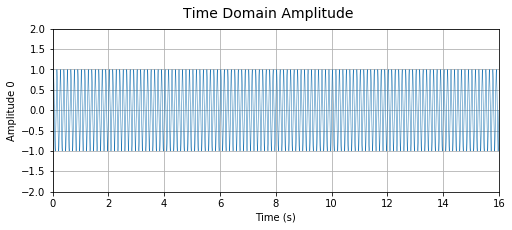

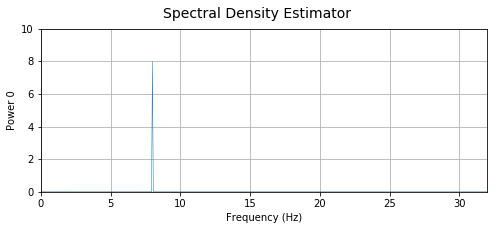

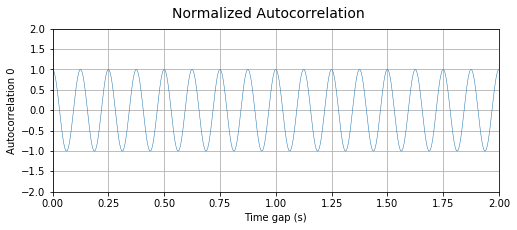

In [14]:
Td  = 16.     # total signal duration
fs  = 512     # sampling rate
N   = Td*fs   # total number of samples
f0  = 8.      # sinus wave frequency

t   = np.linspace(0, Td, int(N)) 
xi  = np.sin(2*np.pi*f0*t)
X   = MRPy(xi, fs=fs)

f00 = X.plot_time(fig=0, figsize=(8,3), axis_t=[0, Td, -2.0,  2.0])
f01 = X.plot_freq(fig=1, figsize=(8,3), axis_f=[0, 32,  0.0, 10.0])
f02 = X.plot_corr(fig=2, figsize=(8,3), axis_T=[0,  2, -2.0,  2.0])

### 8.4. White noise and pink noise <a name="section_84"></a> 

A _gaussian white noise_ is a signal with random amplitude with normal distribution and 
a constant power density all over the frequency domain:

$$ S_X(\omega) = S_0 $$

The associated autocorrelation function is a Dirac's Delta at the origin, with an
infinite pulse integral.
This signal in practice must have a limited band, otherwise the corresponding variance 
would be infinite. For practical purposes a signal is considered to be a white noise
if the power is constant (within some statistical error) over some frequency band
$\Delta\omega = \omega_2 - \omega_1$, which is relevant for the analysis:

$$ S_X(\omega) = S_0, \hspace{5mm} {\rm for} 
                      \hspace{5mm} \omega_1 \leq \omega \leq \omega_2 $$ 

In this case the variance is:

$$ \sigma_X = 2\Delta\omega S_0$$

Denoting $$ and the band center, the autocorrelation function results

Let us take a look on a Gaussian white noise simulation with ``MRPy``:

Mean value:         0.0055
Standard deviation: 1.0000 



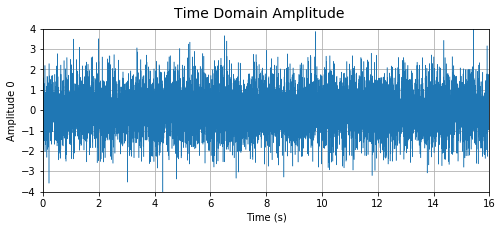

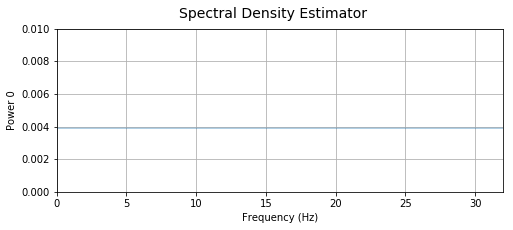

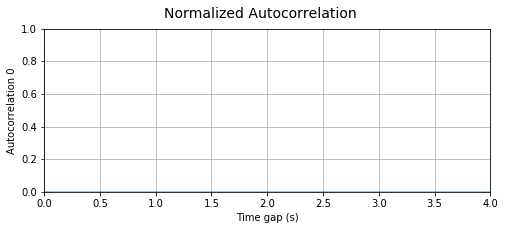

In [24]:
X = MRPy.white_noise(N=2**15, fs=512)

print('Mean value:         {0:6.4f}'.format(X[0].mean()))
print('Standard deviation: {0:6.4f}'.format(X[0].std()),'\n')

f03 = X.plot_time(fig=3, figsize=(8,3), axis_t=[0, Td, -4.00,  4.00])
f04 = X.plot_freq(fig=4, figsize=(8,3), axis_f=[0, 32,  0.00,  0.01])
f05 = X.plot_corr(fig=5, figsize=(8,3), axis_T=[0,  4,  0.00,  1.00])

The ``MRPy`` module uses a simulation technique that gives an almost perfectly
constant spectral density and an almost perfectly null autocorrelation (with a Dirac's
pulse at origin.


### 8.5. Signal derivation and integration <a name="section_85"></a> 

As a starting point, let us calculate the following derivative:

$$ \frac{d}{d\tau}\left[ X(t) X(t+\tau) \right] = 
                         X(t) \cdot \frac{d X(t + \tau)}{d(t+\tau)} \cdot \frac{d(t+\tau)}{dt} =
                         X(t) \dot{X}(t+\tau) $$

Now, using the expected value operator and considering autocovariance symmetry:

$$ \frac{d C_X(\tau)}{d\tau} = {\rm E}\left\{ X(t) \dot{X}(t+\tau) \right\} 
                             = {\rm E}\left\{ X(t-\tau) \dot{X}(t) \right\} $$

and following the logic to find the second derivative:

$$ \frac{d^2 C_X(\tau)}{d\tau^2} = -{\rm E}\left\{\dot{X}(t) \dot{X}(t+\tau) \right\} 
                                 = - C_{\dot{X}} (\tau)$$

With this result at hand, we go back to the relation between power density and 
autocovariance:

$$ C_X(\tau) = \int_{-\infty}^{+\infty} {S_X(\omega) e^{-i\omega\tau} \, d\omega} $$

and apply double derivative:

\begin{align*}
\frac{d C_X(\tau)}{d\tau}     &=  
  \int_{-\infty}^{+\infty} {i\omega  S_X(\omega) e^{-i\omega\tau} \, d\omega}   \\
\frac{d^2 C_X(\tau)}{d\tau^2} &= 
- \int_{-\infty}^{+\infty} {\omega^2 S_X(\omega) e^{-i\omega\tau} \, d\omega}
\end{align*}

Now, considering that the following relation is also valid:

$$ C_\dot{X}(\tau) = \int_{-\infty}^{+\infty} {S_\dot{X}(\omega) e^{-i\omega\tau} \, d\omega} $$

It finally results that:

\begin{align*}
S_\dot{X} (\omega) &= \omega^2 S_\dot{X} (\omega) \\
S_\ddot{X}(\omega) &= \omega^4 S_\ddot{X}(\omega)
\end{align*}

These relations allow us to calculate the spectral density of velocity and
acceleration processes from the spectral density of displacement process, or vice-versa.
They are quite useful for converting signal amplitudes obtained with one type of 
transducer (for instance, an accelerometer) to amplitudes as they would have been
obtained with other type of transducer (for instance, displacement).

The ``MRPy`` class provides the calculation of derivatives and integrals in
frequency domain, as demonstrated below. The methods allow the definition
of a passing frequency band, for simultaneously eliminating noise errors.


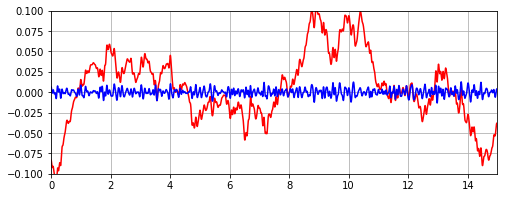

In [3]:
A1   =  X.integrate(band=[0, 16])
A2   =  X.integrate(band=[4, 16])

f05  =  plt.figure(5, figsize=(8,3))
f05a =  plt.plot(A1.t_axis(), A1[0], 'r')
f05b =  plt.plot(A2.t_axis(), A2[0], 'b')

plt.axis([0, 15, -0.1, 0.1])
plt.grid(True)


Whenever a signal is integrated without a low frequency cut, 
a _zero drift_ is expected to happen! This can be avoided by setting a lower frequency
bound as high as possible without attenuating the useful part of the signal.

The derivative calculation is useful as a stationarity test:

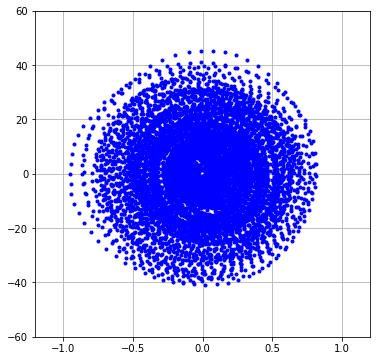

In [4]:
V    =  Y.differentiate(band=[2, 16])

f05  =  plt.figure(5, figsize=(6,6))
f05a =  plt.plot(Y[0], V[0], 'b.')

plt.axis([-1.2, 1.2, -60, 60])
plt.grid(True)


The lack of correlation between the process and its derivative observed above is an
evidence of process stationarity.

### 8.6. Level crossing rate and peak factor  <a name="section_86"></a> 

Below is an example where a gaussian white noise is fed into
a linear inertial system (damped oscillator) and the resulting output is analysed:

In [ ]:
X = MRPy(np.random.randn(2**15), fs=512)
Y = 1000*X.sdof_Duhamel(8, 0.05)

f00  = X.plot_time(fig=0, figsize=(8,3), axis_t=[0, 16, -5.00, 5.00])
f01  = Y.plot_time(fig=1, figsize=(8,3), axis_t=[0, 16, -1.00, 1.00])
f02  = Y.plot_freq(fig=2, figsize=(8,3), axis_f=[0, 32,  0.00, 0.10])
f03  = Y.plot_corr(fig=3, figsize=(8,3), axis_T=[0,  8, -1.00, 1.00])

In [5]:
Tobs   = 600
gDaven = Y.Davenport(T=Tobs)
gsplit = Y.splitmax(T=Tobs)

Ypeak = Y[0].mean() + gDaven[0]*Y[0].std()

print('Peak factor from Davenport:  {0:6.3f}'.format(gDaven[0]))
print('Peak factor from splitmax:   {0:6.3f}'.format(gsplit[0]))
print('Peak value for displacement: {0:6.3f}'.format(Ypeak))

Peak factor from Davenport:   4.259
Peak factor from splitmax:    3.013
Peak value for displacement:  1.334


### 8.6. Frequency domain signal filtering <a name="section_86"></a> 



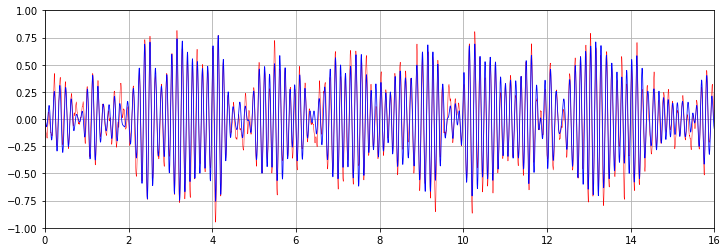

In [6]:
Z    =  Y.filtered(band=[6, 10], mode='pass')

f06  =  plt.figure(6, figsize=(12,4))
f06a =  plt.plot(Y.t_axis(), Y[0], 'r', lw=0.5)
f06b =  plt.plot(Z.t_axis(), Z[0], 'b', lw=0.8)

plt.axis([0, 16, -1.00, 1.00])
plt.grid(True)


### 8.8. Cross correlation and coherence functions <a name="section_88"></a> 


### 8.9. Simulation of cross-correlated signals <a name="section_89"></a> 
